In [1]:
import matplotlib.pyplot as plt
#data manipulations
import numpy as np
import pandas as pd
#pytorch
import torchvision
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as f
#scraping from internet
from PIL import Image
#scraping from internet
import requests
from io import BytesIO
# time related
from timeit import default_timer as timer

In [3]:
#Fish Dataset Loader
transforms_fish = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.RandomHorizontalFlip(p = 0.5)
])


# datasets
trainset_fish = torchvision.datasets.ImageFolder("../input/fish-data/train", transform = transforms_fish)
validset_fish = torchvision.datasets.ImageFolder("../input/fish-data/val", transform = transforms_fish)
testset_fish = torchvision.datasets.ImageFolder("../input/fish-data/test", transform = transforms_fish)

#batches
batch_size = 64

# loaders for data
trainloader_fish = torch.utils.data.DataLoader(trainset_fish , batch_size=batch_size , shuffle = True)
validloader_fish = torch.utils.data.DataLoader(validset_fish , batch_size=batch_size , shuffle = True)
testloader_fish = torch.utils.data.DataLoader(testset_fish  , batch_size=batch_size)

In [4]:
#Dog Dataset Loader
mean = [3.89455125276032e-06, 0.00014938852662573483, 0.005843691424839318]
std = [0.28401965297405607, 0.25763376048862824, 0.212752166246306]

transforms_dog = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.RandomHorizontalFlip(p = 0.5),
    torchvision.transforms.Normalize(mean,std)
])


# datasets
trainset_dog = torchvision.datasets.ImageFolder("../input/dog-50-breed/train", transform = transforms_dog)
testset_dog = torchvision.datasets.ImageFolder("../input/dog-50-breed/test", transform = transforms_dog)

#batches 
batch_size = 64

# loaders for data
trainloader_dog = torch.utils.data.DataLoader(trainset_dog , batch_size=batch_size , shuffle = True)
testloader_dog = torch.utils.data.DataLoader(testset_dog  , batch_size=batch_size)

In [5]:
#Cat Dataset Loader
# transforms for images
mean= [1.237415388955464e-07, 1.0974480745087072e-05, 0.0013912996138222156]
std= [0.32490545666192855, 0.2765586123633468, 0.23786083779317993]

transforms_cat = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.RandomHorizontalFlip(p = 0.5),
    torchvision.transforms.Normalize(mean,std)
])


# datasets
trainset_cat = torchvision.datasets.ImageFolder("../input/cat-27-data/train", transform = transforms_cat)
validset_cat = torchvision.datasets.ImageFolder("../input/cat-27-data/val", transform = transforms_cat)
testset_cat = torchvision.datasets.ImageFolder("../input/cat-27-data/test", transform = transforms_cat)

#batches
batch_size = 64

# loaders for data
trainloader_cat = torch.utils.data.DataLoader(trainset_cat , batch_size=batch_size , shuffle = True)
validloader_cat = torch.utils.data.DataLoader(validset_cat , batch_size=batch_size , shuffle = True)
testloader_cat = torch.utils.data.DataLoader(testset_cat  , batch_size=batch_size)

In [6]:
#print all classes of all 3 datasets
print("-------------------------------------FISH--------------------------")
print("Unique classes number : ",len(trainset_fish.classes))
print("Classes : ", trainset_fish.classes)
print("\n\n")
print("-------------------------------------DOG--------------------------")
print("Unique classes number : ",len(trainset_dog.classes))
print("Classes : ", trainset_dog.classes)
print("\n\n")
print("-------------------------------------CAT--------------------------")
print("Unique classes number : ",len(trainset_cat.classes))
print("Classes : ", trainset_cat.classes)



-------------------------------------FISH--------------------------
Unique classes number :  9
Classes :  ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']



-------------------------------------DOG--------------------------
Unique classes number :  50
Classes :  ['Afghan_hound', 'Airedale', 'Australian_terrier', 'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel', 'Boston_bull', 'Dandie_Dinmont', 'EntleBucher', 'Great_Pyrenees', 'Ibizan_hound', 'Irish_terrier', 'Irish_wolfhound', 'Italian_greyhound', 'Japanese_spaniel', 'Kerry_blue_terrier', 'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa', 'Maltese_dog', 'Newfoundland', 'Norfolk_terrier', 'Norwegian_elkhound', 'Norwich_terrier', 'Old_English_sheepdog', 'Pembroke', 'Pomeranian', 'Rhodesian_ridgeback', 'Saluki', 'Samoyed', 'Scottish_deerhound', 'Sealyham_terrier', 'Shih-Tzu', 'Siberian_husky', 'Tibetan_terrier', 'West_

In [7]:
# Whether to train on a gpu
my_gpu = torch.cuda.is_available()
print(f'Train on gpu: {my_gpu}')
device = torch.device('cuda' if my_gpu else 'cpu')
print(f"my device: {torch.cuda.get_device_name(0)}")

Train on gpu: True
my device: Tesla T4


In [8]:
#format class

class color_formats:
    """
    Simple color formating:
    Variables:
        >OKCYAN - cyan printing.
        >Bold - bold printing.
        >UNDERLINE - underline printing.
    """
    OKCYAN = '\033[96m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [9]:
from torchvision import models
import torch.nn.functional as F
# Use resnet-50 as a base model
class net(torch.nn.Module):
    def __init__(self, base_model, base_out_features, num_classes):
        super(net,self).__init__()
        self.base_model=base_model
        self.linear1 = torch.nn.Linear(base_out_features, 512)
        self.output = torch.nn.Linear(512,num_classes)
    def forward(self,x):
        x = F.relu(self.base_model(x))
        x = F.relu(self.linear1(x))
        x = self.output(x)
        return x

In [10]:
#load all 9 train from scratch model instances 
fetch_model_mv2_cat=torch.load('../input/all-scratch-models/all_pb_scratch_models_AI_vishvesh/mobilenetv2_cat.pb')
fetch_model_mv2_dog=torch.load('../input/all-scratch-models/all_pb_scratch_models_AI_vishvesh/mobilenetv2_dog.pb')
fetch_model_mv2_fish=torch.load('../input/all-scratch-models/all_pb_scratch_models_AI_vishvesh/mobilenetv2_fish.pb')
fetch_model_18_cat=torch.load('../input/all-scratch-models/all_pb_scratch_models_AI_vishvesh/resnet18_cat.pb')
fetch_model_18_dog=torch.load('../input/all-scratch-models/all_pb_scratch_models_AI_vishvesh/renet18_dog.pb')
fetch_model_18_fish=torch.load('../input/all-scratch-models/all_pb_scratch_models_AI_vishvesh/resnet18_fish.pb')
fetch_model_50_cat=torch.load('../input/all-scratch-models/all_pb_scratch_models_AI_vishvesh/resnet50_cat.pb')
fetch_model_50_dog=torch.load('../input/all-scratch-models/all_pb_scratch_models_AI_vishvesh/resnet50_dog.pb')
fetch_model_50_fish=torch.load('../input/all-scratch-models/all_pb_scratch_models_AI_vishvesh/resnet50_fish.pb')

In [23]:
def predictor(model,transforms,trainset,img, n=1):
    """
    Args: 
        >model - fetch model passes here.
        >transforms - some data augmenetation operations.
        >trainset - loaded dataset with classes.
        >img - the image to predict.
        >n - number of top probabilities.
    
    Outputs:
        >pred - the top prediction.
        > top preds - top n predictions.
    """
    #transform the image
    img = transforms(img)
    # get the class predicted 
    pred = int(np.squeeze(model(img.unsqueeze(0).cuda()).data.max(1, keepdim=True)[1].cpu().numpy()))
    # the number is also the index for the class label
    pred = trainset.classes[pred]
    # get model log probabilities
    preds = torch.from_numpy(np.squeeze(model(img.unsqueeze(0).cuda()).data.cpu().numpy()))
    # convert to prediction probabilities of the top n predictions
    top_preds = torch.topk(torch.exp(preds),n)
    #display at an orgenized fasion
    top_preds = dict(zip([trainset.classes[i] for i in top_preds.indices],[f"{round(float(i)*100,2)}%" for i in top_preds.values]))
    return pred, top_preds

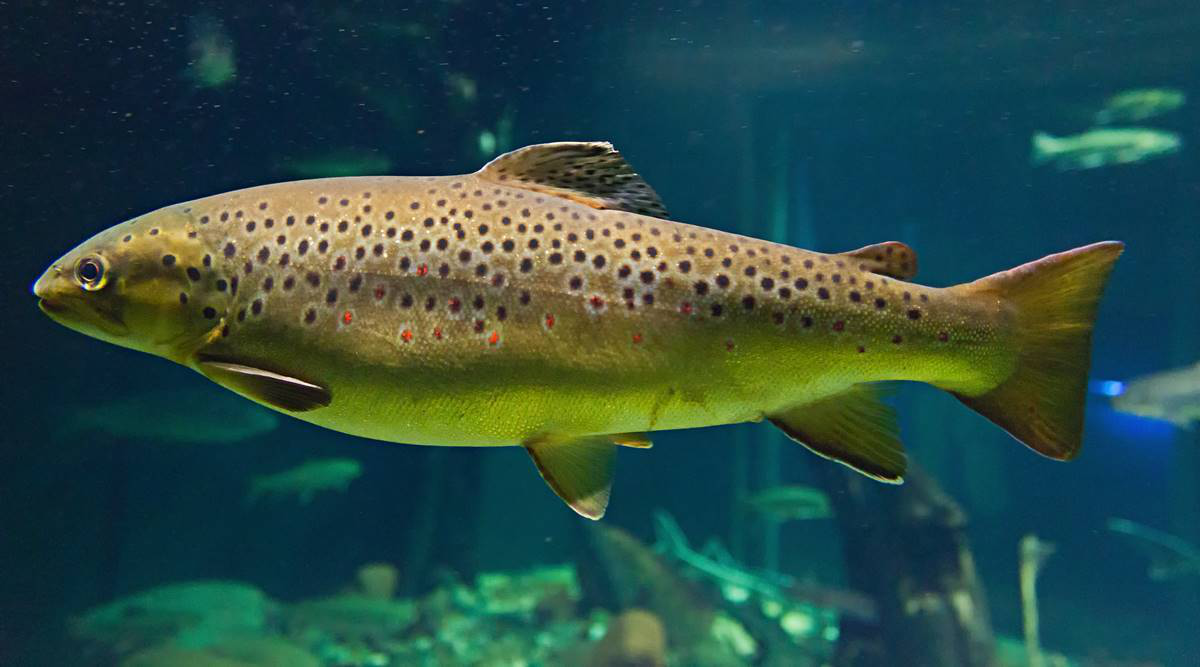

In [11]:
url = "https://images.indianexpress.com/2021/09/Salmo_trutta_Ozeaneum_Stralsund_HBP_2010-07-02.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [32]:
all_9_results = dict()

In [35]:
my_prediction, top_predictions = predictor(fetch_model_mv2_cat,transforms_cat,trainset_cat,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_mv2_dog,transforms_dog,trainset_dog,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_mv2_fish,transforms_fish,trainset_fish,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_18_cat,transforms_cat,trainset_cat,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_18_dog,transforms_dog,trainset_dog,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_18_fish,transforms_fish,trainset_fish,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_50_cat,transforms_cat,trainset_cat,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_50_dog,transforms_dog,trainset_dog,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_50_fish,transforms_fish,trainset_fish,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

In [46]:
Keymax = max(all_9_results, key= lambda x: all_9_results[x])
#print(Keymax)

if Keymax in trainset_cat.classes:
    print(f"----  Animal  is : {color_formats.BOLD} Cat {color_formats.ENDC} And Breed is :{color_formats.BOLD} {color_formats.OKCYAN}{Keymax} {color_formats.ENDC} ----")
    
if Keymax in trainset_dog.classes:
    print(f"----  Animal  is : {color_formats.BOLD} Dog {color_formats.ENDC} And Breed is : {color_formats.BOLD}{color_formats.OKCYAN}{Keymax} {color_formats.ENDC}----")
    
if Keymax in trainset_fish.classes:
    print(f"----  Animal  is : {color_formats.BOLD} Fish {color_formats.ENDC} And Breed is : {color_formats.BOLD}{color_formats.OKCYAN}{Keymax} {color_formats.ENDC} ----")

----  Animal  is :  Fish  And Breed is : Trout  ----


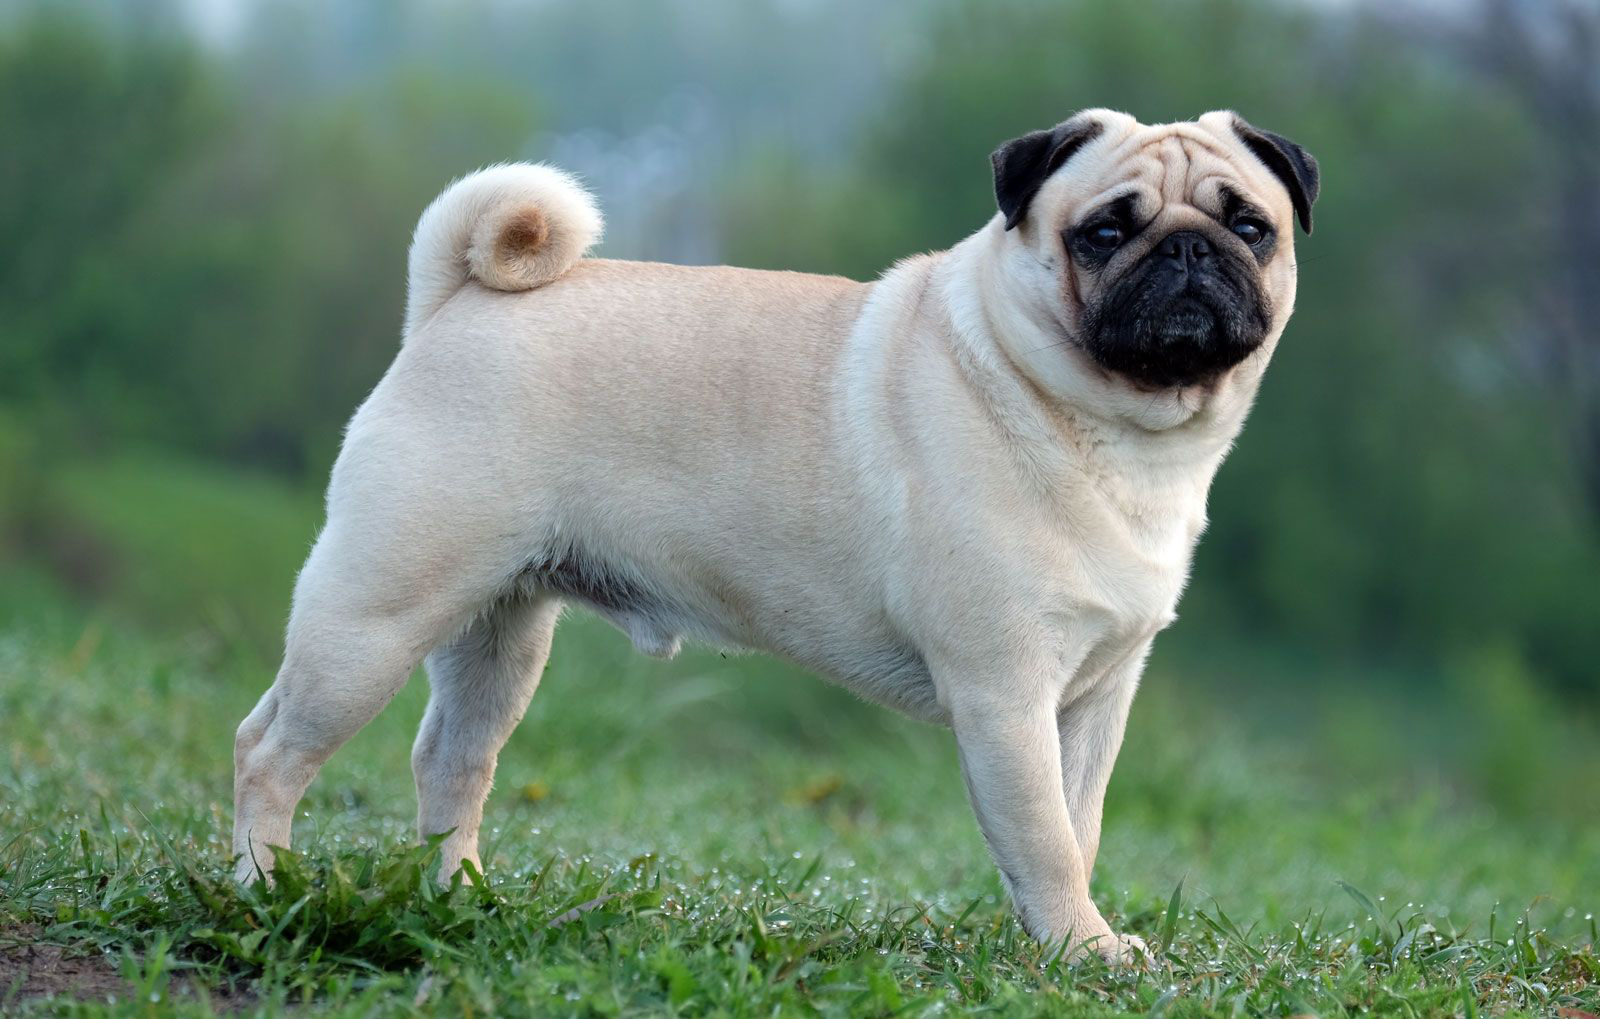

In [57]:
import requests
from io import BytesIO
url = "https://cdn.britannica.com/34/233234-050-1649BFA9/Pug-dog.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [58]:
all_9_results = dict()

In [59]:
my_prediction, top_predictions = predictor(fetch_model_mv2_cat,transforms_cat,trainset_cat,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_mv2_dog,transforms_dog,trainset_dog,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_mv2_fish,transforms_fish,trainset_fish,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_18_cat,transforms_cat,trainset_cat,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_18_dog,transforms_dog,trainset_dog,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_18_fish,transforms_fish,trainset_fish,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_50_cat,transforms_cat,trainset_cat,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_50_dog,transforms_dog,trainset_dog,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_50_fish,transforms_fish,trainset_fish,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

In [67]:
Keymax = max(all_9_results, key= lambda x: all_9_results[x])
#print(Keymax)

if Keymax in trainset_cat.classes:
    print(f"----  Animal  is : {color_formats.BOLD} Cat {color_formats.ENDC} And Breed is :{color_formats.BOLD} {color_formats.OKCYAN}{Keymax} {color_formats.ENDC} ----")
    
if Keymax in trainset_dog.classes:
    print(f"----  Animal  is : {color_formats.BOLD} Dog {color_formats.ENDC} And Breed is : {color_formats.BOLD}{color_formats.OKCYAN}{Keymax} {color_formats.ENDC}----")
    
if Keymax in trainset_fish.classes:
    print(f"----  Animal  is : {color_formats.BOLD} Fish {color_formats.ENDC} And Breed is : {color_formats.BOLD}{color_formats.OKCYAN}{Keymax} {color_formats.ENDC} ----")

----  Animal  is :  Dog  And Breed is : pug ----


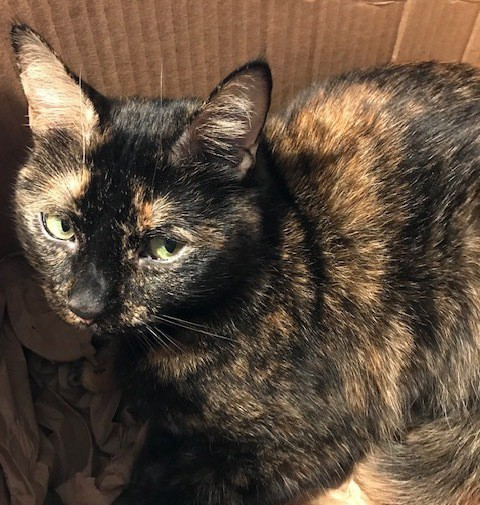

In [68]:
url="https://miro.medium.com/max/480/1*GbRhRIqKOptCViOs4LJDCQ.jpeg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [69]:
all_9_results = dict()

In [70]:
my_prediction, top_predictions = predictor(fetch_model_mv2_cat,transforms_cat,trainset_cat,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_mv2_dog,transforms_dog,trainset_dog,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_mv2_fish,transforms_fish,trainset_fish,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_18_cat,transforms_cat,trainset_cat,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_18_dog,transforms_dog,trainset_dog,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_18_fish,transforms_fish,trainset_fish,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_50_cat,transforms_cat,trainset_cat,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_50_dog,transforms_dog,trainset_dog,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

my_prediction, top_predictions = predictor(fetch_model_50_fish,transforms_fish,trainset_fish,img)
all_9_results[my_prediction]=float(list(top_predictions.values())[0][:-1])

In [71]:
Keymax = max(all_9_results, key= lambda x: all_9_results[x])
#print(Keymax)

if Keymax in trainset_cat.classes:
    print(f"----  Animal  is : {color_formats.BOLD} Cat {color_formats.ENDC} And Breed is :{color_formats.BOLD} {color_formats.OKCYAN}{Keymax} {color_formats.ENDC} ----")
    
if Keymax in trainset_dog.classes:
    print(f"----  Animal  is : {color_formats.BOLD} Dog {color_formats.ENDC} And Breed is : {color_formats.BOLD}{color_formats.OKCYAN}{Keymax} {color_formats.ENDC}----")
    
if Keymax in trainset_fish.classes:
    print(f"----  Animal  is : {color_formats.BOLD} Fish {color_formats.ENDC} And Breed is : {color_formats.BOLD}{color_formats.OKCYAN}{Keymax} {color_formats.ENDC} ----")

----  Animal  is :  Cat  And Breed is : Tortoiseshell  ----
